<a href="https://colab.research.google.com/github/victorviro/Machine-Learning-Python/blob/master/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors

The $k$-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. This is an  instance-based learning algorithm since, instead of performing explicit generalization (like linear regression), compares new instances with instances seen in training, which have been stored in memory.


To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset, the *nearest neighbors*.

## KNN Classification

In its simplest version, the $k$-NN algorithm only considers exactly one nearest neighbor ($k=1$), which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point.

Instead of considering only the closest neighbor, we can consider an arbitrary number, $k$, of neighbors. This is where the name of the $k$-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to each class, that is, we count how many neighbors belong to class 0, how many neighbors belong to class 1, how many neighbors belong to class 2, and so on. We then assign the more frequent class: in other words, the majority class among the $k$-nearest neighbors. 

Now let’s look at how we can apply the $k$-nearest neighbors algorithm using Scikit-learn and the iris dataset.

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Load iris dataset
iris = datasets.load_iris()
X = iris.data 
y = iris.target

# Split in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

# Initialize the Estimator object
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model using training set 
knn.fit(X_train, y_train)

# Create a prediction array for our test set
y_pred = knn.predict(X_test)

# Compute the score
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Let's use only the features sepal length and sepal width and produce the visualizations of the decision boundaries for one, three, and nine neighbors.

No handles with labels found to put in legend.


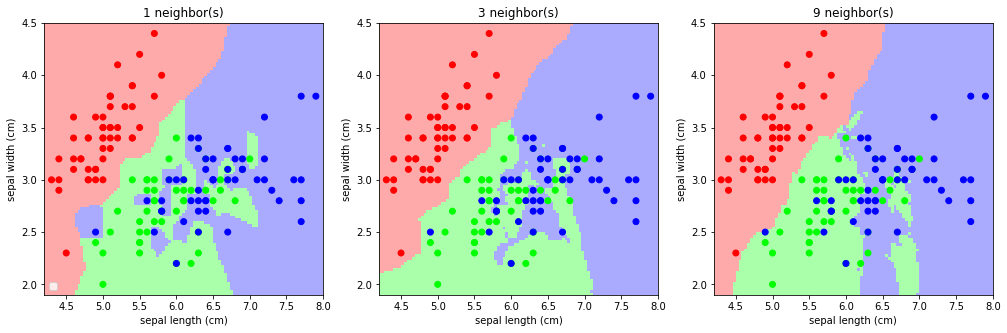

In [8]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

X = iris.data[:, :2]  # we only take the first two features
y = iris.target

# Get the max and min values of the features
x0_min, x0_max = X[:, 0].min() - .1, X[:, 0].max() + .1
x1_min, x1_max = X[:, 1].min() - .1, X[:, 1].max() + .1

# Build fictional test features to build the plot 
x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                     np.linspace(x1_min, x1_max, 100))

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # Initialize the Estimator object
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit the model 
    knn.fit(X, y)
    Z = knn.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)
    ax.pcolormesh(x0, x1, Z, cmap=cmap_light)
    # Plot also the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('sepal width (cm)')

axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using a few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity. If we consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

Let’s investigate whether we can confirm the connection between model complexity and generalization. We will do this on the iris dataset. We begin by splitting the dataset into a training and a test set. Then we evaluate training and test set performance with different numbers of neighbors.

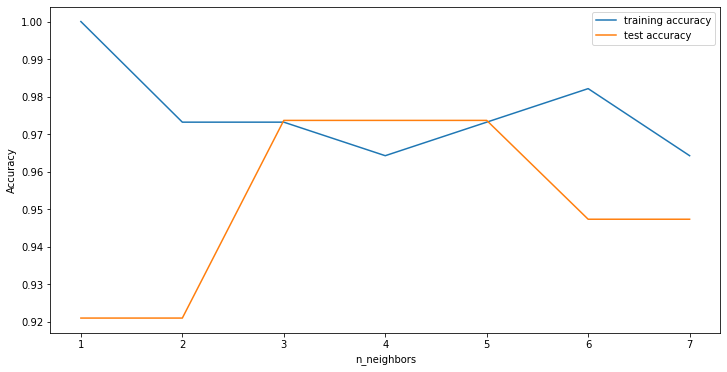

In [9]:
X = iris.data 
y = iris.target

# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

training_accuracy = []
test_accuracy = []
# Try n_neighbors from 1 to 7
neighbors_settings = range(1, 8)
for n_neighbors in neighbors_settings:
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The plot shows the training and test set accuracy on the y-axis against the setting of `n_neighbors` on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 7 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around five neighbors. Still, it is good to keep the scale of the plot in mind. 

## KNN regression

The prediction using a single neighbor is just the target value of the nearest neighbor. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors.

The k-nearest neighbors algorithm for regression is implemented in the [`KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) class in Scikit-learn . It’s used similarly to [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

We can also evaluate the model using the `score` method, which for regressors returns the $R^2$ score. The $R^2$ score, also known as the coefficient of determination, is the proportion of the variance in the target variable that is explained by the features. It's is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses.

## Strengths and weaknesses of KNN

One of the strengths of $k$-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow.

When using the $k$-NN algorithm, it’s important to preprocess our data (rescale the features, convert categorical features to numerical,...). This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (*sparse datasets*).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.

## How do we measure our nearest neighbors?

Apart from the $k$ parameter, there is another important parameter to the K-Neighbors classifier: measure distance between data points. By default, Euclidean distance is used, which works well in many settings.

The distance is a numerical description of how far apart entities are. In data mining, the distance means a concrete way of describing what it means for elements of some space to be close to or far away from each other. Synonyms for distance include farness, dissimilarity, diversity, and synonyms for similarity include proximity, nearness. The distance function between two vectors $x$ and $y$ is a function $d(x, y)$ that defines the distance between both vectors as a non-negative real number. This function is considered as a metric if it satisfies a certain number of properties: non-negativity, identity, symmetry, and the triangle inequality. 

When the distance is in the range [0, 1], the calculation of a corresponding similarity measure $s(x, y)$ is as follows:
$$s(x, y) = 1 - d(x, y)$$

Some alternative distance metrics include the Manhattan distance (L1 norm), the Chebyshev distance (maximum value distance), and more. For more information, you can check the paper [Distance and Similarity Measures Effect on the Performance of K-Nearest Neighbor Classifier](https://arxiv.org/abs/1708.04321).

# References

- [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/)

- [Nearest Neighbors in Scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)

- [Nearest-neighbor prediction on iris](https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html)

- [Distance and Similarity Measures Effect on the Performance of K-Nearest Neighbor Classifier](https://arxiv.org/abs/1708.04321)